# Regresión logistica

Una regresión logistica no es mas que una variante de la regresión lineal donde la variable de salida es categorica. 

Una regresión logistica es una variante del modelo original que tiene una salida categorica.

La regresión lineal como sabemos es una recta que se ajusta de tal manera que todos los datos queden a la minima distancia de la recta.

Y la regresión logistica predice una que va desde 0 a 1 en el caso de una variable.

Las diferencias son:

| Regresión Lineal | Regresión Logística |
| ---------------- | ------------------- |
| Utilizada para predecir una variable continua | Utilizada para predecir una variable discreta (binaria o multinomial) |
| El modelo se ajusta a una línea recta que se ajusta a los datos | El modelo se ajusta a una curva logística que se ajusta a los datos |
| No tiene límites en la predicción de la variable dependiente | Las predicciones están limitadas entre 0 y 1 |
| La variable dependiente es numérica | La variable dependiente es categórica |
| El coeficiente de determinación (R²) se utiliza para evaluar el ajuste del modelo | La precisión del modelo se evalúa utilizando la tasa de aciertos, la precisión y otras medidas específicas de clasificación |
| Los residuos se miden como la diferencia entre el valor real y el valor predicho | La deviance se utiliza para medir la bondad del ajuste del modelo |
| La regresión lineal simple puede ser resuelta mediante la fórmula de mínimos cuadrados ordinarios | La regresión logística no puede ser resuelta mediante una fórmula y requiere algoritmos de optimización como el Gradiente Descendente o el Método de Newton-Raphson |
| Puede haber relaciones lineales entre múltiples variables independientes y la variable dependiente | La regresión logística es útil para modelar relaciones no lineales entre las variables independientes y la variable dependiente |


## Las matetmaticas tras la regresión logistica

Imagina que queremos saber si un cliente que entra a una tienda, compra o no un determinado producto a partir solamente de su genero, si es hombre o es mujer. 

La respuesta esta dada por la probabilidad:

¿Cual es la probabilidad de que un cliente compre un determinado producto dependiendo si es hombre o es mujer?.

In [3]:
import pandas as pd

df = pd.read_csv("../datasets/gender-purchase/Gender Purchase.csv")
df.head()

     ---------------------------------------- 11.2/11.2 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 7.9 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 7.6 MB/s eta 0:00:00


,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


Este dataset contiene el genero del comprador en la primera columna y en la segunda indica si compró o no el producto en cuestion

In [4]:
df.shape

(511, 2)

La herramienta que se suele usar en las estadistica para explicar la infomación en estos casos es la **tabla de contingencia**. La tabla de contigencia es la representación de las frecuencia en la que caen ambas categorias.

Es solamente una tabla diciendo con que frecuencia ocurre un suceso para cada categoria.

In [5]:
contingency_table = pd.crosstab(df.Gender, df.Purchase)
contingency_table.head()

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


- Tenemos 106 mujeres que no compraron el producto
- Tambien 125 hombres que no compraron el producto
- 159 Mujeres compraron el producto
- 121 Hombres compraron el producto

In [6]:
# PTC
df_ptc = contingency_table.div(df.shape[0], axis=0)
df_ptc = df_ptc.mul(100)
df_ptc = df_ptc.apply(lambda x: (round(x, 2)))
df_ptc_gender = contingency_table.div(contingency_table.sum(axis=1), axis=0)
df_ptc_gender = df_ptc_gender.round(2)

De todos los encuestados un (31.12%) de mujeres si compraron el producto y es mayor al porcentaje de hombres que compraron el producto (23.68%). Esta información es util para saber el comportamiento de compra por genero para hacer publicidad dirigida

In [8]:
print("Total de personas encuestadas por genero")
print(contingency_table.sum(axis=1).to_markdown())
print("Total de las personas que compraron el producto")
print(contingency_table.to_markdown())
print("Total de las personas que compraron el producto porcentaje")
print(df_ptc.to_markdown())
print("Porcentaje de la suma por filas")
print(df_ptc_gender.to_markdown())


| Gender   |   0 |
|:---------|----:|
| Female   | 265 |
| Male     | 246 |
Total de las personas que compraron el producto
| Gender   |   No |   Yes |
|:---------|-----:|------:|
| Female   |  106 |   159 |
| Male     |  125 |   121 |
Total de las personas que compraron el producto porcentaje
| Gender   |    No |   Yes |
|:---------|------:|------:|
| Female   | 20.74 | 31.12 |
| Male     | 24.46 | 23.68 |
Porcentaje de la suma por filas
| Gender   |   No |   Yes |
|:---------|-----:|------:|
| Female   | 0.4  |  0.6  |
| Male     | 0.51 |  0.49 |


## La probabilidad condicional
La probabilidad condicional responde a la pregunta:
- ¿Cual es la probabilidad de que un cliente compre un producto sabiendo que es hombre?
- ¿Cual es la probabilidad de que un cliente compre un producto sabiendo que es mujer?

$$
P(Purchase | Male) = \frac{\text{Numero total de compras hechas por hombres}}{\text{Total de hombres del gurpo}}
$$

O

$$
P(Purchase | Male) = \frac{Purchase \cap Male}{Male}
$$

Podemos aprovechar la tabla de contingencia para calcular las probabilidades condicionada

In [9]:
purchase_male = df.query("Gender == 'Male' & Purchase == 'Yes'").shape[0]
total_male = df.query("Gender == 'Male'").shape[0]

purchase_female = df.query("Gender == 'Female' & Purchase == 'Yes'").shape[0]
total_female = df.query("Gender == 'Female'").shape[0]

no_purchase_female = total_female - purchase_female
no_purchase_male = total_male - purchase_male
purchase_male_prob = purchase_male / total_male
purchase_female_prob = purchase_female / total_female
no_purchase_female_prob = no_purchase_female / total_female
no_purchase_male_prob = no_purchase_male / total_male
dict_result = {
    "Male": [purchase_male_prob, no_purchase_male_prob],
    "Female": [purchase_female_prob, no_purchase_female_prob]
}


df_result = pd.DataFrame(dict_result).T
df_result.columns = ["Purchase Probability", "No Purchase Probability"]

# Probabilidad condicional
df_result


,Purchase Probability,No Purchase Probability
Male,0.49187,0.50813
Female,0.60000,0.40000


## Razon de probabilidades

Es el cociente de los casos de exito para cada uno de los grupos. El ratio de exito para un grupo determinado se define como el cociente de probabilidades de exito entre las probabilidades de fracaso

$$
odds_{Purchase, Male} = \frac{P_m}{1-P_m}\\
odds_{Purchase, Female} = \frac{P_f}{1-P_f}
$$

In [10]:
odds_f = purchase_female_prob / (1-purchase_female_prob)
odds_m = purchase_male_prob / (1-purchase_male_prob)

In [11]:
print("Proporcion probabilistica de hombres que compran el producto")
print(odds_m)
print("Proporcion probabilistica de mujeres que compran el producto")
print(odds_f)

Proporcion probabilistica de hombres que compran el producto
0.9680000000000002
Proporcion probabilistica de mujeres que compran el producto
1.4999999999999998


Este valor es mayor a 1, nos dice que la probabilidad de exito es mayor a la de fracaso. Mientras mayor sea el número la probabilidad de exito será mayor.

- Si la razon >1 es mas probable el exito
- Si la ración es =1 es equiprobabile el exito y el fracaso
- Si la razon <1 Es mas probable el fracaso

En este caso las mujeres son mas propensas a comprar que un hombre.

La ecuación de una regresión lineal venía dada por la eucación de una recta.

$$y = \alpha (x) + \beta / (x, y) \in (-\infty, \infty)$$

En el caso de la regresión logistica
$$y \in [0, 1]$$

Para esto podemos buscar un valor de una probabilidad que valla de 0 a 1 para representar la respuesta del modelo. Para ello podriamos aplicar el logaritmo natural sobre P y dividir por 1-P para poder dejar el dominio del resultado entre cero y 1. Al despejar esta ecuación nos queda que:

$$
P = \frac{1}{1+e^{-(\alpha (x) + \beta)}}
$$

Alpha y beta se obtiene con las reglas que ya sabemos de la regresión y la formula sigue las siguientes reglas:

- Si a+bX es muy pequeño (negativo), entonces P tiende a 0
- Si a+bX es 0, P = 0.5
- Si a+bX es muy grande (positivo), entonces P tiende a 1.


Para la regresión logistica multiple se siguen usando las reglas de la regresión, solamente se agregan mas parámetros a la regresión y se aplica la misma formula. 

In [14]:
# Regresion Logistica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/bank/bank.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [15]:
df["Y"] = np.where(df["y"] == "yes", 1, 0)

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


In [17]:
# El nivel de educación es una de las variables mas importantes para determinar si alguien compra un producto bancario
df["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [18]:
df["education"] = np.where(df["education"] == "basic.4y", "Basic", df["education"])
df["education"] = np.where(df["education"] == "basic.6y", "Basic", df["education"])
df["education"] = np.where(df["education"] == "basic.9y", "Basic", df["education"])
df["education"] = np.where(df["education"] == "high.school", "High School", df["education"])
df["education"] = np.where(df["education"] == "university.degree", "University Degree", df["education"])
df["education"] = np.where(df["education"] == "professional.course", "Professional Course", df["education"])
df["education"] = np.where(df["education"] == "unknown", "Unknown", df["education"])
df["education"] = np.where(df["education"] == "illiterate", "Illiterate", df["education"])

df["education"].unique()

# Reducir el numero de categorias, para tener mejor interpretabilidad de los datos

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [19]:
# Agrupamos por si compra o no el producto
df.groupby("y").mean()

TypeError: Could not convert blue-collarservicesservicesservicesadmin.servicesadmin.entrepreneurservicesblue-collarservicesself-employedadmin.blue-collaradmin.servicesadmin.admin.entrepreneurservicestechnicianmanagementtechniciantechnicianblue-collaradmin.admin.technicianservicestechnicianblue-collartechnicianblue-collarblue-collarmanagementtechnicianstudentservicesblue-collarretiredentrepreneurhousemaidmanagementadmin.admin.servicesservicesretiredblue-collarmanagementadmin.entrepreneuradmin.admin.admin.entrepreneurblue-collarservicesblue-collaradmin.technicianservicesself-employedadmin.managementadmin.admin.self-employedunemployedtechniciantechnicianadmin.servicesretiredentrepreneuradmin.unemployedblue-collarunemployedblue-collarblue-collarself-employedblue-collarmanagementretiredtechnicianmanagementadmin.managementadmin.servicesadmin.servicesservicesentrepreneurblue-collarblue-collarmanagementadmin.blue-collarblue-collarmanagementadmin.managementservicesblue-collarretiredself-employedblue-collarservicesblue-collarentrepreneurtechnicianblue-collaradmin.self-employedmanagementmanagementservicestechnicianadmin.admin.techniciantechniciantechnicianadmin.servicesblue-collarservicestechnicianunknownadmin.blue-collaradmin.technicianblue-collarblue-collarservicestechnicianadmin.unemployedadmin.admin.admin.servicesadmin.blue-collarservicesadmin.blue-collaradmin.servicesservicestechniciantechnicianblue-collarretiredmanagemententrepreneurtechnicianmanagementretiredmanagementadmin.self-employedblue-collarblue-collarhousemaidtechnicianservicesblue-collarblue-collartechniciantechnicianstudentstudentadmin.self-employedservicesadmin.blue-collarmanagementmanagementservicesblue-collarentrepreneurservicestechnicianblue-collaradmin.servicesmanagementadmin.blue-collarretiredstudententrepreneuradmin.managementblue-collartechnicianretiredblue-collarunknownblue-collarservicesunemployedretiredblue-collarblue-collarservicesunknownblue-collartechnicianservicesmanagementtechnicianblue-collarhousemaidadmin.self-employedadmin.admin.admin.technicianmanagementtechnicianmanagementadmin.blue-collaradmin.self-employedtechnicianadmin.servicesunemployedunemployedblue-collarhousemaidadmin.blue-collarretiredservicestechnicianservicesblue-collaradmin.studententrepreneurblue-collarmanagementself-employedself-employedtechnicianhousemaidblue-collarblue-collarblue-collarblue-collaradmin.managementblue-collarmanagementadmin.blue-collartechnicianunemployedtechnicianentrepreneuradmin.self-employedblue-collarblue-collaradmin.admin.admin.admin.technicianadmin.retiredblue-collaradmin.admin.entrepreneurblue-collarhousemaidadmin.servicesblue-collaradmin.admin.technicianservicesadmin.admin.self-employedentrepreneurmanagementblue-collarentrepreneuradmin.unemployedtechniciantechnicianservicesservicesunknownblue-collarself-employedblue-collarblue-collaradmin.admin.technicianadmin.technicianunknownentrepreneurservicesadmin.admin.servicesadmin.blue-collarunemployedservicesblue-collaradmin.managementmanagementblue-collaradmin.servicesunemployedblue-collarmanagementtechnicianentrepreneurblue-collaradmin.admin.blue-collaradmin.servicesadmin.unemployedservicestechnicianadmin.admin.managementtechnicianself-employedtechnicianadmin.admin.blue-collaradmin.self-employedadmin.managementself-employedtechnicianadmin.technicianretiredblue-collartechniciantechnicianentrepreneurblue-collarblue-collarblue-collaradmin.blue-collaradmin.blue-collartechniciantechnicianmanagementadmin.technicianstudentmanagementadmin.technicianadmin.blue-collarblue-collarblue-collarentrepreneuradmin.admin.admin.managementself-employedblue-collarstudentmanagementunemployedadmin.blue-collaradmin.blue-collarservicesadmin.technicianmanagementmanagementtechniciantechnicianblue-collarentrepreneurmanagementtechnicianadmin.self-employedservicesmanagementtechnicianblue-collarhousemaidmanagementunknownservicesservicesadmin.technicianblue-collartechnicianadmin.admin.unknownself-employedblue-collaradmin.blue-collarblue-collaradmin.servicesblue-collarmanagemententrepreneurtechnicianblue-collaradmin.blue-collarunknownadmin.managementself-employedhousemaidblue-collartechnicianmanagementtechnicianmanagementblue-collaradmin.blue-collarblue-collarblue-collarblue-collaradmin.managementself-employedtechnicianadmin.servicesadmin.blue-collaradmin.entrepreneurblue-collarunknownentrepreneurblue-collartechnicianunemployedblue-collarblue-collarblue-collarretiredmanagementservicesentrepreneurtechnicianadmin.blue-collarblue-collartechnicianblue-collarblue-collaradmin.self-employedunemployedtechnicianstudenttechniciantechnicianadmin.technicianmanagementadmin.unemployedtechnicianretiredblue-collartechnicianblue-collarblue-collaradmin.blue-collarhousemaidservicesblue-collaradmin.admin.admin.blue-collarblue-collaradmin.servicesadmin.techniciantechnicianmanagementmanagementtechnicianadmin.admin.technicianself-employedblue-collarblue-collartechniciantechnicianadmin.self-employedtechnicianstudentblue-collaradmin.retiredretiredtechnicianblue-collaradmin.blue-collarservicesadmin.unknowntechnicianblue-collaradmin.managementmanagementblue-collarmanagementmanagementadmin.admin.admin.blue-collarentrepreneurblue-collaradmin.technicianmanagementadmin.admin.admin.blue-collarhousemaidblue-collartechnicianretiredblue-collarblue-collaradmin.blue-collarblue-collarblue-collarentrepreneurservicesretiredadmin.technicianadmin.blue-collaradmin.servicesblue-collarself-employedblue-collarblue-collartechnicianhousemaidunemployedretiredadmin.blue-collartechnicianblue-collarblue-collarmanagementmanagementtechnicianmanagemententrepreneurblue-collarblue-collarself-employedservicestechnicianunemployedtechniciantechnicianadmin.admin.technicianblue-collarmanagementadmin.technicianblue-collarblue-collarstudenthousemaidadmin.blue-collaradmin.admin.admin.retiredadmin.admin.housemaidstudentadmin.managementadmin.admin.servicesself-employedadmin.unemployedmanagementservicestechnicianblue-collaradmin.technicianadmin.technicianblue-collaradmin.admin.admin.managementtechnicianblue-collaradmin.techniciantechnicianmanagementstudentretiredblue-collarblue-collaradmin.admin.admin.admin.technicianretiredblue-collaradmin.retiredblue-collartechnicianretiredadmin.techniciantechniciantechnicianblue-collartechnicianblue-collaradmin.technicianadmin.studentblue-collartechnicianadmin.technicianblue-collartechniciantechnicianretiredmanagementtechnicianadmin.technicianentrepreneurblue-collartechniciantechnicianadmin.studentblue-collaradmin.admin.housemaidretiredmanagementmanagementservicestechniciantechniciantechnicianadmin.blue-collarmanagementadmin.servicesblue-collarservicesadmin.admin.technicianservicesadmin.serviceshousemaidblue-collaradmin.technicianblue-collarblue-collartechnicianadmin.admin.technicianblue-collartechnicianblue-collaradmin.blue-collarentrepreneuradmin.blue-collarblue-collarmanagementadmin.managementadmin.blue-collaradmin.unemployedblue-collaradmin.admin.admin.technicianblue-collarblue-collarblue-collarentrepreneurblue-collarstudentmanagementservicesadmin.technicianadmin.blue-collaradmin.servicesadmin.technicianadmin.admin.techniciantechnicianadmin.technicianblue-collarmanagementadmin.self-employedservicesblue-collarservicestechnicianserviceshousemaidself-employedblue-collarblue-collaradmin.housemaidentrepreneurself-employedadmin.blue-collarstudentunemployedblue-collaradmin.admin.technicianretiredblue-collarmanagementmanagementadmin.technicianstudenttechnicianservicesself-employedservicesblue-collarblue-collarself-employedservicesadmin.admin.technicianself-employedtechnicianblue-collarservicesblue-collarblue-collarblue-collaradmin.admin.servicesblue-collarblue-collarmanagementblue-collaradmin.admin.blue-collarretiredretiredadmin.technicianadmin.unknownadmin.technicianblue-collaradmin.admin.admin.blue-collaradmin.technicianblue-collarservicesservicesservicestechnicianentrepreneurmanagementtechnicianadmin.admin.unemployedblue-collarmanagementservicestechnicianblue-collartechniciantechnicianstudentblue-collaradmin.blue-collarretiredadmin.technicianblue-collartechnicianblue-collarservicesblue-collarself-employedentrepreneurentrepreneurtechnicianservicesentrepreneurblue-collaradmin.managementadmin.managementblue-collaradmin.managementtechnicianadmin.blue-collarblue-collartechnicianretiredadmin.admin.admin.admin.technicianadmin.entrepreneurtechnicianblue-collartechnicianblue-collaradmin.managementmanagementservicesblue-collarblue-collarentrepreneurservicesservicesservicesmanagementservicesunemployedself-employedservicesunemployedservicesadmin.blue-collarblue-collarservicestechnicianblue-collarself-employedunknownadmin.retiredadmin.servicesblue-collarservicesstudentservicesadmin.admin.blue-collarunemployedservicesadmin.managementservicesadmin.admin.technicianblue-collarself-employedtechnicianunknownblue-collarunemployedblue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.blue-collaradmin.blue-collaradmin.technicianblue-collarblue-collaradmin.admin.admin.blue-collarentrepreneurretiredtechnicianadmin.blue-collarblue-collarentrepreneurtechnicianservicesservicesself-employedhousemaidhousemaidtechnicianmanagementblue-collartechnicianadmin.blue-collarmanagementadmin.managementtechnicianservicesblue-collarretiredblue-collaradmin.admin.admin.housemaidadmin.admin.blue-collarself-employedadmin.blue-collarblue-collarentrepreneuradmin.admin.unemployedservicesretiredservicesadmin.admin.technicianentrepreneurservicesadmin.technicianself-employedblue-collarunemployedadmin.blue-collarblue-collaradmin.blue-collarservicesblue-collarmanagementadmin.serviceshousemaidservicesentrepreneurblue-collaradmin.managementblue-collaradmin.self-employedtechnicianunemployedentrepreneurblue-collarblue-collaradmin.servicestechnicianentrepreneurmanagementblue-collarhousemaidservicesmanagementservicesblue-collarblue-collarretiredentrepreneuradmin.admin.blue-collarblue-collaradmin.servicesentrepreneurretiredservicesadmin.technicianretiredunemployedtechniciantechnicianhousemaidtechnicianservicesunemployedadmin.admin.techniciantechniciantechnicianadmin.technicianblue-collarservicesblue-collartechnicianadmin.blue-collaradmin.servicesblue-collarentrepreneurunemployedself-employedblue-collarself-employedadmin.technicianadmin.blue-collarretiredtechnicianself-employedretiredservicesretiredadmin.blue-collarmanagementstudentservicesmanagementblue-collarentrepreneurretiredadmin.admin.admin.servicesstudentblue-collarstudentadmin.blue-collarmanagementblue-collarunknownself-employedself-employedmanagementservicesservicesretiredtechnicianmanagementtechnicianadmin.managementtechnicianself-employedunemployedmanagementservicesservicesblue-collaradmin.blue-collaradmin.technicianblue-collarmanagementblue-collartechnicianblue-collarmanagementblue-collarretiredtechnicianadmin.admin.techniciantechnicianblue-collaradmin.servicesself-employedblue-collartechnicianunemployedunknownservicesadmin.admin.retiredentrepreneurservicesservicesadmin.blue-collarservicesadmin.servicesmanagementmanagementservicesadmin.servicesadmin.blue-collarblue-collarblue-collarstudentadmin.blue-collarmanagementblue-collaradmin.admin.blue-collarblue-collaradmin.technicianretiredservicesadmin.entrepreneuradmin.technicianservicesmanagementretiredservicesadmin.studentblue-collaradmin.blue-collarservicesadmin.unknownentrepreneuradmin.admin.technicianadmin.technicianblue-collaradmin.managementservicesmanagementblue-collaradmin.technicianadmin.techniciantechnicianadmin.blue-collaradmin.admin.self-employedtechniciantechnicianservicesentrepreneurblue-collaradmin.technicianblue-collarservicesblue-collarblue-collartechnicianentrepreneurmanagementblue-collarunemployedservicesadmin.servicesadmin.blue-collarself-employedservicesadmin.entrepreneuradmin.admin.technicianself-employedservicestechnicianhousemaidadmin.blue-collarblue-collarblue-collaradmin.blue-collarservicesself-employedadmin.technicianblue-collarservicesadmin.managementmanagementadmin.blue-collartechnicianentrepreneurunknowntechnicianservicestechnicianretiredadmin.servicestechnicianservicestechnicianservicesservicesadmin.studenttechnicianblue-collarmanagementadmin.blue-collarblue-collaradmin.servicestechnicianretiredadmin.techniciantechnicianmanagementretiredtechnicianhousemaidadmin.admin.admin.admin.technicianblue-collarblue-collartechnicianadmin.technicianblue-collarstudentunemployedservicesblue-collaradmin.admin.blue-collaradmin.blue-collaradmin.admin.servicestechnicianadmin.servicesblue-collarblue-collaradmin.retiredblue-collarhousemaidblue-collaradmin.managementtechnicianservicesservicestechnicianretiredtechnicianretiredadmin.admin.blue-collarservicesblue-collarblue-collartechnicianadmin.technicianblue-collarblue-collaradmin.admin.admin.managementtechnicianblue-collaradmin.admin.admin.blue-collaradmin.admin.entrepreneurmanagementtechnicianblue-collaradmin.retiredservicestechnicianentrepreneurservicestechnicianadmin.servicesadmin.blue-collarmanagementtechniciantechniciantechnicianadmin.blue-collaradmin.entrepreneurself-employedtechnicianentrepreneurself-employedstudententrepreneurblue-collarblue-collaradmin.retiredadmin.blue-collarservicestechnicianunknownblue-collaradmin.admin.entrepreneurblue-collarhousemaidunemployedhousemaidblue-collarblue-collarblue-collartechnicianblue-collarblue-collartechnicianself-employedtechnicianentrepreneuradmin.technicianunknowntechnicianadmin.blue-collarblue-collarmanagementblue-collarblue-collarretiredmanagementservicesblue-collarblue-collarstudentblue-collarblue-collarblue-collarblue-collarunemployedblue-collarstudenttechnicianretiredadmin.self-employedadmin.technicianblue-collarblue-collaradmin.technicianself-employedstudentunemployedadmin.techniciantechnicianblue-collartechniciantechnicianadmin.blue-collaradmin.technicianretiredunemployedadmin.blue-collaradmin.blue-collaradmin.admin.managementblue-collaradmin.entrepreneurblue-collarmanagementtechnicianself-employedentrepreneuradmin.housemaidhousemaidmanagementadmin.unemployedblue-collarblue-collarblue-collaradmin.admin.retiredadmin.blue-collarentrepreneurmanagementadmin.technicianblue-collarunemployedadmin.blue-collaradmin.housemaidtechnicianadmin.technicianblue-collarblue-collaradmin.servicesadmin.managementadmin.retiredadmin.managementblue-collartechniciantechnicianunknownblue-collarstudentblue-collarself-employedtechnicianadmin.managementstudenttechniciantechnicianblue-collarmanagementblue-collaradmin.retiredtechniciantechnicianservicesmanagementadmin.servicesadmin.admin.managementservicestechnicianblue-collarblue-collaradmin.admin.technicianblue-collartechnicianblue-collarentrepreneurtechnicianhousemaidtechnicianservicesservicesblue-collarretiredservicesservicesadmin.admin.entrepreneurtechnicianservicesadmin.admin.technicianservicesservicesservicesadmin.admin.admin.blue-collarentrepreneurblue-collarunknownunemployedblue-collarentrepreneurblue-collaradmin.self-employedservicesadmin.housemaidservicesmanagementadmin.blue-collarentrepreneurblue-collarmanagementmanagementtechnicianhousemaidtechnicianmanagementtechnicianhousemaidblue-collarblue-collaradmin.self-employedblue-collarservicesadmin.self-employedstudenttechnicianentrepreneurtechnicianhousemaidhousemaidadmin.unemployedservicesadmin.blue-collarservicestechnicianadmin.admin.studentunemployedblue-collarservicesblue-collarblue-collarservicesmanagementadmin.self-employedadmin.techniciantechnicianretiredadmin.blue-collarblue-collartechniciantechnicianadmin.managementtechnicianblue-collarunemployedtechnicianself-employedservicesservicesmanagementretiredtechnicianadmin.technicianblue-collarunemployedadmin.technicianblue-collaradmin.blue-collarunemployedtechniciantechnicianmanagementadmin.blue-collaradmin.self-employedblue-collartechnicianadmin.managementmanagementblue-collarblue-collarretiredtechnicianadmin.technicianadmin.admin.servicesservicesadmin.blue-collartechnicianmanagementblue-collarmanagementtechnicianhousemaidblue-collartechnicianservicesadmin.technicianadmin.admin.blue-collarblue-collartechnicianentrepreneuradmin.housemaidtechnicianadmin.self-employedunknownblue-collarblue-collarmanagementadmin.entrepreneurunemployedtechnicianblue-collartechnicianblue-collarservicesadmin.admin.self-employedservicesadmin.admin.blue-collarself-employedtechnicianblue-collarblue-collarservicesadmin.blue-collartechniciantechnicianblue-collarservicesservicestechnicianservicesadmin.admin.housemaidmanagementtechnicianadmin.technicianblue-collaradmin.studentmanagementblue-collarself-employedtechniciantechnicianentrepreneurtechnicianadmin.technicianunemployedmanagementblue-collaradmin.self-employedmanagementself-employedadmin.techniciantechnicianadmin.technicianservicesservicesentrepreneurblue-collartechnicianblue-collarblue-collarblue-collarservicestechniciantechnicianblue-collaradmin.managementadmin.technicianserviceshousemaidunknownblue-collartechnicianmanagementblue-collarservicesblue-collarservicesmanagementblue-collaradmin.admin.managementmanagementadmin.technicianhousemaidadmin.technicianadmin.technicianservicesblue-collaradmin.self-employedadmin.technicianhousemaidmanagementservicesblue-collaradmin.technicianadmin.housemaidadmin.blue-collartechnicianservicesblue-collaradmin.blue-collarself-employedtechnicianadmin.admin.self-employedblue-collaradmin.admin.admin.managementadmin.admin.self-employedretiredtechnicianservicestechnicianblue-collarself-employedadmin.housemaidtechnicianadmin.housemaidadmin.blue-collarself-employedadmin.technicianadmin.blue-collarblue-collarretiredtechnicianstudentunemployedadmin.admin.technicianblue-collarblue-collaradmin.technicianblue-collartechnicianadmin.techniciantechnicianservicesadmin.admin.admin.managementretiredblue-collarself-employedmanagementunemployedtechnicianmanagementadmin.studentadmin.admin.admin.entrepreneurtechnicianself-employedtechnicianadmin.managementblue-collaradmin.admin.retiredadmin.entrepreneurblue-collaradmin.blue-collaradmin.servicesadmin.servicesunemployedblue-collaradmin.housemaidservicesunemployedhousemaidblue-collarblue-collarunknownself-employedtechnicianadmin.blue-collartechniciantechnicianadmin.admin.servicesblue-collarstudentblue-collartechnicianmanagementblue-collarhousemaidblue-collartechnicianhousemaidmanagementunemployedself-employedblue-collarblue-collaradmin.blue-collartechnicianhousemaidadmin.unemployedservicesadmin.unemployedtechnicianblue-collaradmin.technicianadmin.blue-collarservicesadmin.admin.servicesblue-collarblue-collaradmin.technicianadmin.managementblue-collarunknownblue-collartechnicianblue-collarstudententrepreneurstudentmanagementblue-collarblue-collartechnicianadmin.self-employedstudentadmin.blue-collaradmin.blue-collarretiredblue-collarhousemaidservicesblue-collaradmin.retiredservicesadmin.managementblue-collarunemployedserviceshousemaidadmin.admin.self-employedadmin.technicianadmin.technicianblue-collarblue-collarblue-collarblue-collarblue-collarself-employedtechnicianmanagementblue-collarblue-collarservicesblue-collaradmin.technicianhousemaidblue-collarservicesself-employedself-employedblue-collaradmin.self-employedadmin.retiredblue-collaradmin.blue-collarblue-collartechnicianservicesadmin.blue-collartechnicianblue-collartechnicianmanagementunemployedblue-collaradmin.technicianadmin.admin.admin.blue-collartechnicianblue-collaradmin.housemaidblue-collartechniciantechniciantechnicianadmin.admin.managementretiredtechniciantechnicianadmin.blue-collarblue-collaradmin.retiredadmin.admin.admin.admin.blue-collartechnicianentrepreneurmanagementadmin.self-employedblue-collarmanagementblue-collarmanagementblue-collarself-employedmanagemententrepreneurtechnicianretiredadmin.blue-collartechnicianself-employedservicesadmin.blue-collarmanagementtechnicianblue-collarblue-collartechnicianblue-collarretiredhousemaidadmin.blue-collarself-employedadmin.blue-collarentrepreneurmanagementadmin.entrepreneuradmin.managementadmin.blue-collarmanagementadmin.unemployedtechnicianadmin.blue-collarblue-collartechnicianadmin.blue-collarblue-collarservicesmanagementtechnicianself-employedblue-collartechniciantechniciantechnicianadmin.technicianblue-collarmanagementadmin.servicesmanagementtechnicianblue-collarservicesadmin.blue-collarblue-collarservicesadmin.admin.blue-collarblue-collarmanagementservicestechnicianadmin.servicestechnicianservicesmanagementtechnicianblue-collarunemployedblue-collaradmin.admin.admin.technicianhousemaidtechnicianadmin.admin.admin.admin.blue-collarblue-collarblue-collarblue-collarentrepreneurtechnicianblue-collaradmin.techniciantechnicianservicesself-employedblue-collaradmin.blue-collarunknowntechnicianservicesservicesservicesadmin.entrepreneuradmin.servicesblue-collarblue-collarmanagementretiredblue-collarself-employedadmin.servicesblue-collaradmin.admin.servicesunemployedtechniciantechnicianadmin.managementadmin.self-employedretiredservicesblue-collartechniciantechnicianadmin.technicianservicesblue-collarself-employedmanagementblue-collartechnicianblue-collarmanagementmanagementretiredblue-collarblue-collarhousemaidblue-collarblue-collarentrepreneurmanagementblue-collaradmin.admin.admin.technicianblue-collarblue-collarhousemaidadmin.admin.admin.managementmanagementretiredblue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collartechnicianadmin.technicianadmin.admin.blue-collarself-employedtechnicianadmin.admin.blue-collarmanagementtechniciantechnicianservicestechnicianservicesservicesblue-collarmanagementservicesblue-collarstudentadmin.admin.retiredentrepreneurmanagementadmin.admin.blue-collarmanagementadmin.blue-collartechnicianblue-collarservicesadmin.servicesadmin.managementmanagementadmin.technicianservicesservicesservicesself-employedadmin.blue-collaradmin.entrepreneuradmin.blue-collarblue-collartechnicianblue-collarself-employedadmin.housemaidservicesadmin.managementadmin.admin.managementtechnicianadmin.blue-collarmanagementhousemaidunknownmanagementunemployedretiredtechnicianblue-collarunemployedserviceshousemaidblue-collarblue-collarblue-collarservicesadmin.servicestechniciantechnicianadmin.admin.technicianself-employedmanagementblue-collarblue-collarmanagementblue-collarhousemaidadmin.admin.blue-collarservicesself-employedtechniciantechnicianentrepreneurmanagementtechnicianmanagementblue-collaradmin.technicianentrepreneurtechnicianadmin.admin.admin.managementadmin.technicianunknownblue-collarretiredadmin.blue-collarmanagementadmin.managementunemployedtechnicianblue-collartechnicianmanagementblue-collartechniciantechnicianblue-collarservicestechnicianservicestechnicianmanagementtechniciantechnicianretiredtechnicianservicesservicesblue-collaradmin.servicesmanagementmanagementadmin.technicianentrepreneurentrepreneurstudentadmin.unemployedblue-collartechnicianadmin.technicianself-employedservicesadmin.blue-collarmanagementunemployedblue-collaradmin.admin.technicianblue-collaradmin.admin.admin.entrepreneurblue-collarblue-collarmanagementmanagementtechnicianblue-collaradmin.blue-collarservicesblue-collarblue-collarblue-collaradmin.self-employedblue-collarretiredadmin.blue-collartechnicianstudentunknownadmin.managementservicesstudentadmin.blue-collarservicesservicesadmin.housemaidstudentadmin.entrepreneuradmin.blue-collarblue-collaradmin.unemployedentrepreneurunemployedtechniciantechniciantechnicianblue-collaradmin.admin.techniciantechniciantechnicianretiredadmin.servicesblue-collaradmin.techniciantechnicianservicesservicesadmin.blue-collaradmin.managementmanagementadmin.blue-collartechniciantechnicianblue-collarentrepreneurself-employedblue-collarservicesadmin.admin.technicianadmin.admin.blue-collartechnicianentrepreneurunemployedmanagemententrepreneurservicesself-employedblue-collarblue-collarblue-collaradmin.entrepreneurblue-collartechnicianservicesblue-collarblue-collarentrepreneuradmin.admin.servicesadmin.blue-collarservicestechnicianadmin.unemployedadmin.admin.managementservicesblue-collarblue-collarretiredentrepreneuradmin.technicianentrepreneuradmin.techniciantechnicianservicesadmin.blue-collarservicesmanagementblue-collaradmin.blue-collaradmin.admin.servicesentrepreneurretiredblue-collartechniciantechnicianentrepreneuradmin.technicianservicesblue-collarblue-collaradmin.technicianmanagementblue-collaradmin.retiredtechnicianretiredmanagementadmin.admin.blue-collarself-employedservicesservicesunemployedadmin.technicianunemployedblue-collarblue-collarblue-collarservicesblue-collarmanagementadmin.blue-collartechnicianblue-collarblue-collaradmin.admin.admin.admin.technicianunemployedblue-collaradmin.managementhousemaidmanagementblue-collarblue-collarblue-collaradmin.blue-collarblue-collaradmin.admin.blue-collaradmin.entrepreneurretiredadmin.blue-collarblue-collarblue-collaradmin.admin.blue-collarblue-collarservicesadmin.admin.managementadmin.self-employedtechnicianadmin.servicesblue-collartechnicianservicesservicesself-employedblue-collarmanagementmanagemententrepreneurentrepreneurblue-collarblue-collarhousemaidunemployedblue-collarhousemaidadmin.blue-collaradmin.blue-collarblue-collarblue-collarself-employedtechnicianblue-collarhousemaidtechniciantechnicianself-employedservicestechnicianadmin.servicesadmin.blue-collaradmin.self-employedadmin.entrepreneuradmin.blue-collaradmin.blue-collarblue-collarblue-collartechnicianblue-collarself-employedtechnicianretiredblue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collaradmin.technicianblue-collartechnicianstudentadmin.admin.techniciantechnicianretiredservicesunknownmanagementhousemaidself-employedtechniciantechnicianblue-collarservicesadmin.managementtechnicianmanagementadmin.admin.housemaidservicesblue-collarblue-collarself-employedtechnicianservicesretiredmanagementblue-collarblue-collarhousemaidretiredtechnicianblue-collaradmin.studentretiredadmin.blue-collartechnicianadmin.technicianadmin.technicianblue-collarmanagementadmin.admin.blue-collaradmin.technicianmanagementblue-collarunemployedblue-collarmanagementblue-collarblue-collaradmin.managemententrepreneurmanagementservicesblue-collarblue-collarstudentblue-collarblue-collarblue-collarentrepreneurblue-collaradmin.technicianservicesblue-collarmanagementadmin.entrepreneurtechnicianblue-collarmanagementblue-collartechnicianunemployedtechnicianservicesblue-collarblue-collarblue-collarentrepreneurtechnicianmanagementadmin.technicianservicesblue-collarhousemaidblue-collarunemployedservicesservicesmanagementblue-collarblue-collarentrepreneurmanagementblue-collarentrepreneurself-employedadmin.self-employedtechnicianunknownentrepreneurmanagementadmin.admin.housemaidadmin.technicianblue-collarstudentblue-collartechnicianentrepreneuradmin.admin.blue-collartechnicianadmin.admin.technicianentrepreneurblue-collarhousemaidadmin.admin.unemployedadmin.admin.entrepreneuradmin.blue-collartechniciantechnicianblue-collarunemployedmanagementblue-collarself-employedblue-collarentrepreneurretiredtechnicianadmin.blue-collarblue-collartechnicianadmin.technicianadmin.admin.managemententrepreneurblue-collaradmin.self-employedblue-collaradmin.retiredself-employedblue-collarblue-collarentrepreneuradmin.technicianadmin.blue-collarself-employedadmin.blue-collarhousemaidself-employedmanagementtechnicianadmin.blue-collaradmin.housemaidblue-collaradmin.technicianblue-collaradmin.managementadmin.entrepreneurstudentmanagementstudentself-employedtechnicianblue-collartechnicianadmin.blue-collarblue-collartechnicianretiredadmin.servicesadmin.blue-collartechnicianmanagementadmin.housemaidblue-collarmanagementblue-collartechniciantechnicianadmin.techniciantechnicianadmin.blue-collarblue-collarunemployedself-employedstudentblue-collartechniciantechnicianhousemaidadmin.housemaidadmin.technicianservicesblue-collartechnicianblue-collarmanagementblue-collarmanagementadmin.self-employedservicesunknownmanagementservicesblue-collartechnicianblue-collarmanagementservicesmanagementtechnicianunemployedblue-collarentrepreneurself-employedtechnicianadmin.admin.servicesself-employedadmin.managementservicesentrepreneurtechnicianblue-collarservicestechnicianservicesadmin.housemaidblue-collartechnicianblue-collarblue-collarservicestechniciantechnicianadmin.servicesentrepreneurmanagementadmin.admin.admin.retiredblue-collartechniciantechnicianadmin.blue-collaradmin.admin.servicesblue-collarservicestechniciantechnicianblue-collarblue-collartechnicianblue-collarmanagementadmin.admin.retiredservicesblue-collartechniciantechniciantechnicianadmin.servicesadmin.blue-collarblue-collarblue-collarblue-collarblue-collarself-employedadmin.unemployedblue-collaradmin.servicesblue-collaradmin.technicianblue-collaradmin.housemaidadmin.technicianblue-collarservicesserviceshousemaidblue-collaradmin.technicianmanagementretiredblue-collarblue-collaradmin.servicestechniciantechnicianself-employedservicesunemployedretiredadmin.entrepreneurtechnicianblue-collaradmin.blue-collartechnicianadmin.blue-collarhousemaidtechniciantechniciantechnicianadmin.self-employedblue-collarblue-collaradmin.servicesblue-collarself-employedblue-collartechniciantechnicianretiredadmin.technicianunknownretiredblue-collaradmin.unemployedtechnicianadmin.blue-collaradmin.blue-collarservicesmanagementblue-collarmanagementblue-collartechnicianadmin.blue-collartechnicianservicesmanagementadmin.blue-collaradmin.housemaidblue-collarblue-collarblue-collaradmin.technicianentrepreneurservicesadmin.managementadmin.blue-collaradmin.admin.admin.managementblue-collaradmin.housemaidtechnicianservicesblue-collarservicestechnicianservicestechnicianblue-collaradmin.admin.admin.blue-collaradmin.unemployedmanagementmanagementself-employedstudentadmin.retiredretiredself-employedadmin.retiredmanagementservicestechnicianself-employedblue-collaradmin.admin.admin.blue-collaradmin.admin.blue-collaradmin.admin.housemaidmanagementtechnicianblue-collarstudentservicesadmin.technicianadmin.retiredtechnicianself-employedblue-collarentrepreneurtechniciantechniciantechniciantechniciantechnicianadmin.managementblue-collarblue-collaradmin.technicianadmin.admin.admin.entrepreneurblue-collaradmin.technicianblue-collaradmin.admin.admin.admin.servicesretiredadmin.servicesservicesretiredtechnicianmanagementservicesmanagementadmin.admin.technicianhousemaidhousemaidtechnicianadmin.retiredtechnicianmanagementself-employedservicesadmin.techniciantechnicianblue-collarstudentadmin.managementblue-collarhousemaidblue-collarblue-collaradmin.self-employedmanagementmanagementblue-collarservicesadmin.admin.blue-collartechnicianblue-collartechnicianunemployedtechnicianblue-collartechnicianblue-collartechnicianentrepreneurblue-collartechnicianservicesself-employedtechnicianblue-collarretiredservicestechnicianadmin.blue-collarmanagementservicesadmin.self-employedmanagementservicesblue-collarhousemaidretiredtechnicianservicesself-employedblue-collartechnicianblue-collarmanagementadmin.self-employedadmin.servicesservicestechnicianblue-collartechnicianstudenttechnicianadmin.managemententrepreneurtechniciantechnicianunemployedadmin.blue-collaradmin.admin.servicestechnicianblue-collarstudentadmin.blue-collarblue-collarmanagementhousemaidtechnicianadmin.managementmanagementblue-collartechnicianadmin.admin.admin.technicianblue-collarblue-collarmanagementadmin.blue-collarmanagementmanagementadmin.blue-collarblue-collartechnicianadmin.techniciantechnicianservicesadmin.blue-collarservicesservicesadmin.technicianadmin.admin.servicesblue-collaradmin.technicianentrepreneurtechnicianretiredadmin.entrepreneurmanagementblue-collarservicesretiredadmin.servicesadmin.technicianadmin.admin.blue-collaradmin.technicianadmin.self-employedtechniciantechnicianmanagementservicesblue-collarblue-collarblue-collarblue-collarblue-collartechniciantechniciantechniciantechnicianmanagementhousemaidadmin.blue-collartechnicianmanagementadmin.entrepreneurservicestechniciantechnicianservicesblue-collarservicesblue-collartechnicianhousemaidretiredentrepreneuradmin.admin.entrepreneuradmin.technicianunknownadmin.technicianadmin.technicianadmin.unemployedtechnicianblue-collarblue-collaradmin.servicestechniciantechnicianadmin.managementretiredblue-collartechniciantechnicianadmin.admin.blue-collarservicestechnicianservicestechnicianservicesretiredtechnicianmanagementblue-collartechnicianadmin.retiredblue-collarmanagementmanagementstudentblue-collaradmin.technicianadmin.blue-collaradmin.admin.admin.blue-collarservicesunemployedservicesadmin.admin.servicesservicesadmin.technicianblue-collartechnicianadmin.blue-collartechnicianretiredmanagementunknownmanagementservicesblue-collaradmin.self-employedstudentadmin.managementadmin.studentblue-collartechniciantechnicianblue-collarservicesadmin.admin.admin.servicesadmin.technicianhousemaidadmin.blue-collartechnicianentrepreneuradmin.entrepreneuradmin.blue-collarblue-collarmanagementblue-collarself-employedadmin.blue-collartechnicianmanagementstudentservicesretiredtechnicianblue-collartechnicianservicesblue-collarblue-collarservicesadmin.self-employedunemployedhousemaidtechnicianservicesretiredblue-collarmanagementretiredblue-collaradmin.admin.servicesretiredtechnicianblue-collaradmin.blue-collarhousemaidadmin.technicianunemployedtechniciantechnicianadmin.blue-collarmanagementblue-collarretiredblue-collaradmin.servicesblue-collarhousemaidadmin.admin.entrepreneurblue-collarservicestechnicianhousemaidentrepreneuradmin.admin.retiredhousemaidtechniciantechnicianadmin.admin.admin.studentadmin.management to numeric

In [ ]:
df.groupby("education").mean()

/tmp/ipykernel_36791/699872899.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("education").mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

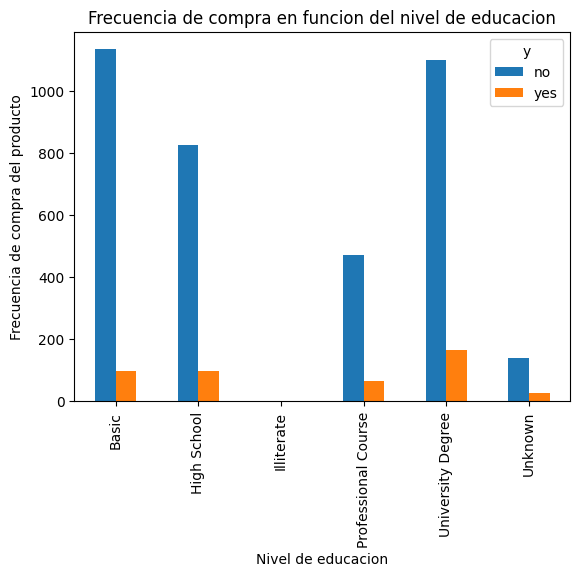

In [ ]:
pd.crosstab(df["education"], df["y"]).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel de educacion")
plt.xlabel("Nivel de educacion")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporcion de clientes')

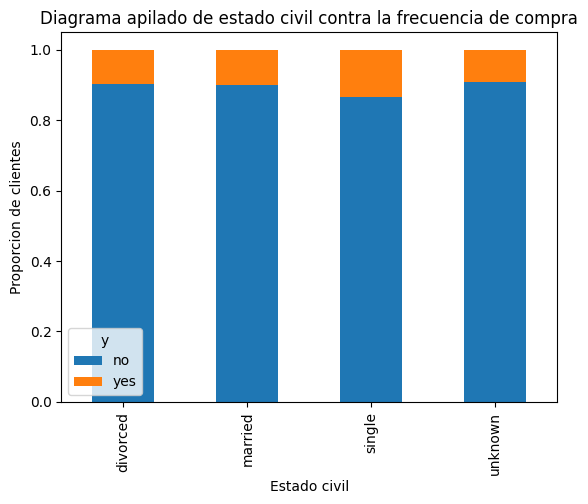

In [20]:
table = pd.crosstab(df["marital"], df["y"])
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra la frecuencia de compra")
plt.xlabel("Estado civil")
plt.ylabel("Proporcion de clientes")
# No es un buen predictor

Text(0, 0.5, 'Frecuencia de compra del producto')

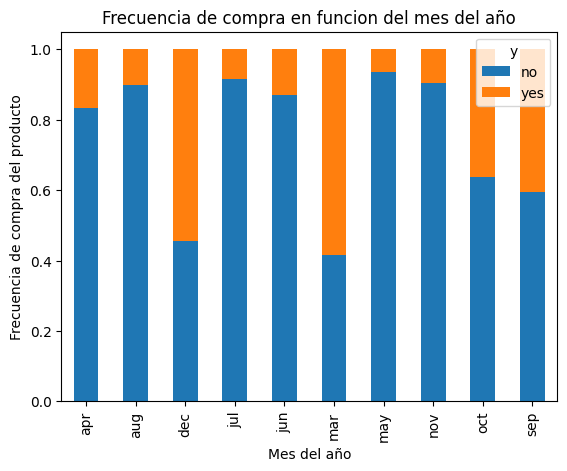

In [21]:
# Intentar averiguar si hay un dia o mes del año en el que se concentren mas las compras
tabla = pd.crosstab(df["month"], df["y"])
tabla.div(tabla.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de mes contra la frecuencia de compra")

plt.title("Frecuencia de compra en funcion del mes del año")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

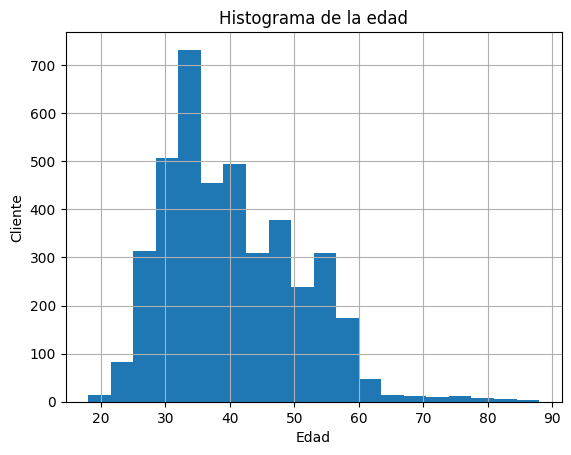

In [22]:
# Edad  
df["age"].hist(bins=20)
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")


Text(0, 0.5, 'Frecuencia de compra del producto')

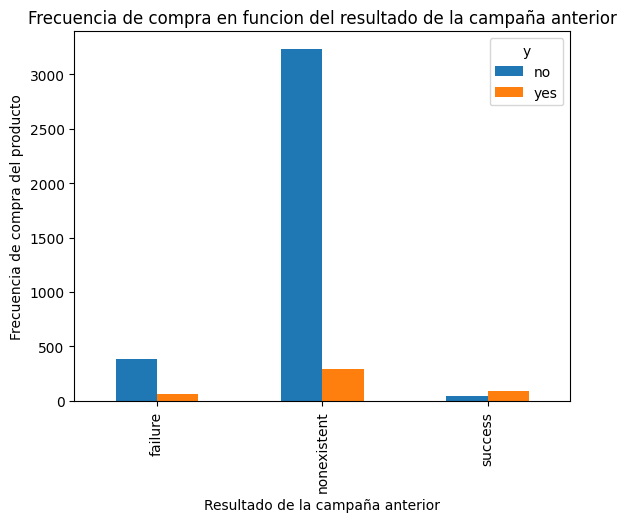

In [23]:
pd.crosstab(df.poutcome, df.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del resultado de la campaña anterior")
plt.xlabel("Resultado de la campaña anterior")
plt.ylabel("Frecuencia de compra del producto")


In [24]:
# Conversión de variables categoricas a variables dummy
categories = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(df[category], prefix=category)
    data1 = df.join(cat_dummies)
    df = data1


In [25]:
to_keep = [v for v in df.columns if v not in categories]
df_final = df[to_keep]
df_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'Y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_

In [26]:
Y = df_final["Y"]
X = df_final.drop(["y", "Y"], axis=1)


In [27]:
# Seleccion de rasgos
n = 12
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=n ,step=1)
selector = selector.fit(X, Y)
selector.support_

c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True])

In [28]:
# Filtrado de rasgos
X_data = X[X.columns[selector.support_]]

In [29]:
model = LogisticRegression()
model.fit(X_data, Y)

model.score(X_data, Y)

0.9009468317552805

In [30]:
pd.DataFrame(list(zip(X_data.columns, np.transpose(model.coef_))))

,0,1
0,euribor3m,[-0.5121141762462201]
1,job_entrepreneur,[-0.31694190600922284]
2,job_self-employed,[-0.34671072091367205]
3,month_apr,[-0.7311248404796886]
4,month_aug,[-0.286224153304847]
5,month_dec,[0.4647301435479661]
6,month_mar,[0.880996434957247]
7,month_may,[-1.1946389559670068]
8,month_nov,[-0.5102060480769001]
9,poutcome_failure,[-0.7062888269417904]


In [31]:
# Validacion del modelo
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size=0.2, random_state=0)

model2 = LogisticRegression()
model2.fit(X_train, Y_train)

model2.score(X_test, Y_test)

0.9138349514563107

In [32]:
prob = model2.predict_proba(X_test)
prob

array([[0.935209  , 0.064791  ],
       [0.87242612, 0.12757388],
       [0.93206436, 0.06793564],
       ...,
       [0.84241957, 0.15758043],
       [0.98484007, 0.01515993],
       [0.93524104, 0.06475896]])

 ## Validación cruzada

La validación cruzada es una tecnica utilizada para medir los resultados de un analisis estadistico y garantizar que son independientes de la partición que se ha hecho entre el conjunto de entrenamiento y los datos de prueba. 

La partición aleatoria si bien sirve, podria ser que la partición este sesgada, y no fuera adecuada. La validación cruzada consiste en partir los datos varias veces, y calcular la media sobre todas las particiones llevadas a cabo, se puede usar en entorno donde el objetivo es predecir los datos pero tambien se puede usar en el caso de clasificadores. 

En general lo que se quiere estimar es la precisión del modelo que se llevará a cabo a la practica. Es una tecnica utilizada para saber si el modelo utilizado es correcto.

Lo que se calcula es el error al estimar todas las particiones y luego se tomará la media de ese error para garantizar la viabilidad de la tecnica. En el caso de la validación cruzada, proviene de la mejora del metodo de retención. 

Este metodo a veces no es demasiado preciso debido a que puede introducir un sesgo si los datos no estan distribuidos con un muestreo aleatorio uniforme, esto puede afectar a la representatividad de los datos.

Tambien es dificil escoger un valor para K, ya que valores muy pequeños pueden aumentar la varianza del error y valores muy grandes pueden aumentar el sesgo del error.

La validación cruzada con K iteraciones, los datos se dividen en K subconjunto, de modo que K subconjunto se usan como datos de pruebas y K-1 como datos de entrenamiento. En el proceso de validación cruzada una vez se ha llevado la prueba, se repite la prueba invirtiendo los roles. Y así sucesivamente haste llegar a K iteraciones. 

Una vez llevadas a cabo las K iteraciones se lleva a cabo una media aritmetica de los resultados de cada iteración para obtener el resultado final.

Otro metodo de validación cruzada aleatoria, y para esto se dividen todos los datos de entrenamiento en un conjunto de prueba y de entrenamiento al azar K veces y el resultado se obtiene de la misma manera. 

Tambien existe el LOOCV que implica separar los datos de forma que en cada iteración tenemos los datos entrenamiento y se deja solo un dato para la prueba, el error resulta ser pequeño. Y el coste computacional es bastante alto.

Estas tecnicas se utilizan para comparar los resultados de varios procedimientos de entrenamiento. Por ejemplo 2 modelos distintos para resolver la misma tarea, ya que ambos permiten clasificar lo mismo, queremos saber cual de los dos modelos es mejor, con la validación cruzada podriamos determinar cual de los dos metodos es mas preciso. 

In [36]:
# Validación cruzada
from sklearn.model_selection import cross_val_score, LeaveOneOut

scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
scores.mean()

# Podemos ver que el modelo tiene un 90% de acierto
# El modelo se ajusta bien a los datos

c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

0.9128386837691636

## Matrices de confunsión

Para evauluar si el modelo tiene un buen resultado final, podemos comparar el resultado real, con el resultado que ha elaborado el modelo, Existen varios modos de hacerlo pero el mas popular son las curvas Matrices de confusión. Las curvas Matrices de confusión es una representación grafica de que tal se comporta un modelo. 

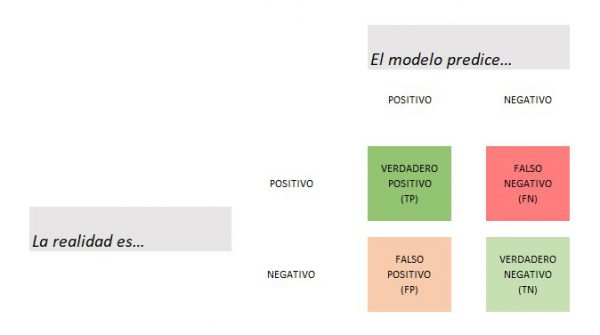

Lo que queremos hacer es que el modelo de el menor numeros de falsos positivos y falsos negativos. 

Tambien podemos sacar las siguientes metricas:

- Numero de positivos TP+FN
- Numero de negativos reales: TN+FP
- Numero de predicciones correctas: TP+TN
- Numero de predicciones incorrectas: FP+FN
- Sensibilidad (TPR) = TP/(TP+FN)
- Especificidad (TNR) = TN/(TN+FP)

## Curvas ROC (Caracteristica operativa del receptor)

- La curva ROC representa la r-Especificidad vs la Sensibilidad
- Incrementar la sensibilidad hará bajar la especificidad
- Cuanto mejor se ajusta la curva al borde superior izquierdo es mejor la predicción
- Mientras mas cerca de la diagonal el modelo es peor 
- Cuanto mayor sea el area bajo la curva, mejor será le predicción



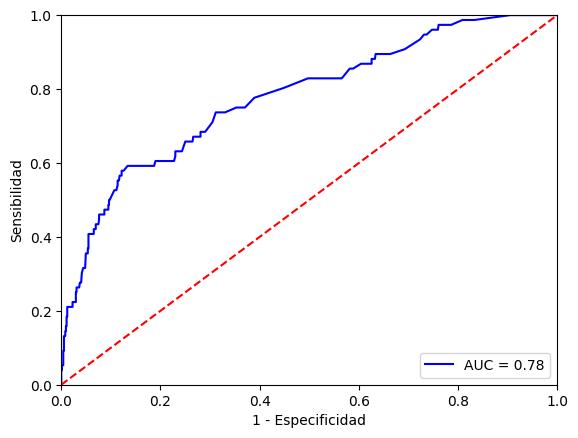

0.7780836616943427

In [40]:
lm = LogisticRegression()
lm.fit(X_train, Y_train)

probs = lm.predict_proba(X_test)
# ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

espc_1, sensit, _ = roc_curve(Y_test, probs[:, 1])
plt.plot(espc_1, sensit, 'b', label='AUC = %0.2f' % auc(espc_1, sensit))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensibilidad')
plt.xlabel('1 - Especificidad')
plt.show()

auc = auc(espc_1, sensit)
auc
# El area bajo la curva es de 0.77 lo que indica que el modelo es bueno